In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

2023-07-19 15:17:04.771530: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-19 15:17:05.122157: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-19 15:17:05.130017: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-19 15:17:07.188583: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [3]:
# x = (x - u) / std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [4]:
# tf.keras.models.Sequential()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
#这次我们做20层
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="selu"))
#结果层
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(0.001),
              metrics=["accuracy"])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               1

In [6]:
model.layers

In [7]:
# Tensorboard, earlystopping, ModelCheckpoint
logdir = './dnn-selu'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
history = model.fit(x_train_scaled, y_train, epochs=100,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks=callbacks)

Epoch 1/100
1719/1719 [==============================] - 15s 8ms/step - loss: 0.6826 - accuracy: 0.7595 - val_loss: 0.5036 - val_accuracy: 0.8178
Epoch 2/100
   8/1719 [..............................] - ETA: 12s - loss: 0.5917 - accuracy: 0.7930

/home/jiangpeng/.virtualenvs/tf2/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1719/1719 [==============================] - 12s 7ms/step - loss: 0.4714 - accuracy: 0.8310 - val_loss: 0.4451 - val_accuracy: 0.8444
Epoch 3/100
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4215 - accuracy: 0.8476 - val_loss: 0.4249 - val_accuracy: 0.8454
Epoch 4/100
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3904 - accuracy: 0.8581 - val_loss: 0.4090 - val_accuracy: 0.8570
Epoch 5/100
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3684 - accuracy: 0.8661 - val_loss: 0.3841 - val_accuracy: 0.8644
Epoch 6/100
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3516 - accuracy: 0.8727 - val_loss: 0.3783 - val_accuracy: 0.8666
Epoch 7/100
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3361 - accuracy: 0.8773 - val_loss: 0.3765 - val_accuracy: 0.8648
Epoch 8/100
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3240 - accuracy: 0.8817 - val_loss: 0.3781 - val_accurac

In [8]:
history.history

{'loss': [0.6826015710830688,
  0.47135117650032043,
  0.4214681386947632,
  0.3904416859149933,
  0.36839738488197327,
  0.35162457823753357,
  0.33613282442092896,
  0.32398703694343567,
  0.31334054470062256,
  0.30332744121551514,
  0.2937752604484558,
  0.2853720486164093,
  0.2783302068710327,
  0.270232230424881,
  0.26342445611953735,
  0.2570083737373352,
  0.25132596492767334,
  0.2449241429567337,
  0.23951858282089233],
 'accuracy': [0.7594909071922302,
  0.8309999704360962,
  0.847563624382019,
  0.8581091165542603,
  0.8660908937454224,
  0.8726727366447449,
  0.8773454427719116,
  0.8817272782325745,
  0.8849090933799744,
  0.8896363377571106,
  0.892799973487854,
  0.8952181935310364,
  0.897599995136261,
  0.901309072971344,
  0.9044908881187439,
  0.9067636132240295,
  0.9076545238494873,
  0.9114000201225281,
  0.9125636219978333],
 'val_loss': [0.5035998821258545,
  0.44512325525283813,
  0.4248887598514557,
  0.409006804227829,
  0.3840837776660919,
  0.37834504246

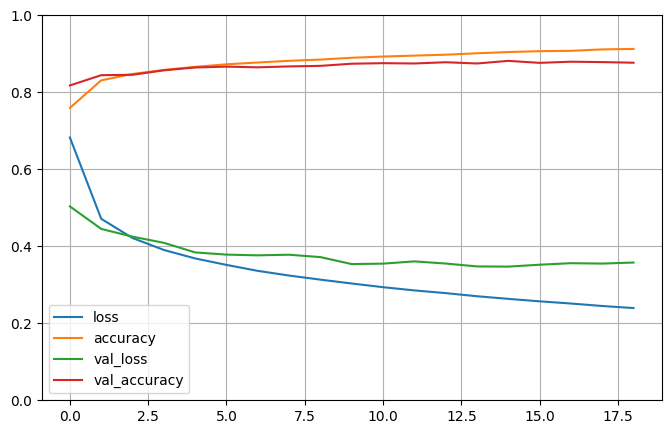

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)
# 1. 参数众多，训练不充分
# 2. 梯度消失 -> 链式法则 -> 复合函数f(g(x))
#    selu缓解梯度消失

In [10]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.3906880021095276, 0.8651999831199646]